In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Color histograms

In [28]:
input_image = cv2.imread("database/01.jpg")
input_image = cv2.resize(input_image, (200, 200))
database_images = []
for filename in os.listdir("database"):
    img = cv2.imread(os.path.join("database", filename))
    database_images.append((filename, img))

In [29]:
def calculate_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

input_hist = calculate_histogram(input_image)
database_histograms = [(name, calculate_histogram(image)) for name, image in database_images]

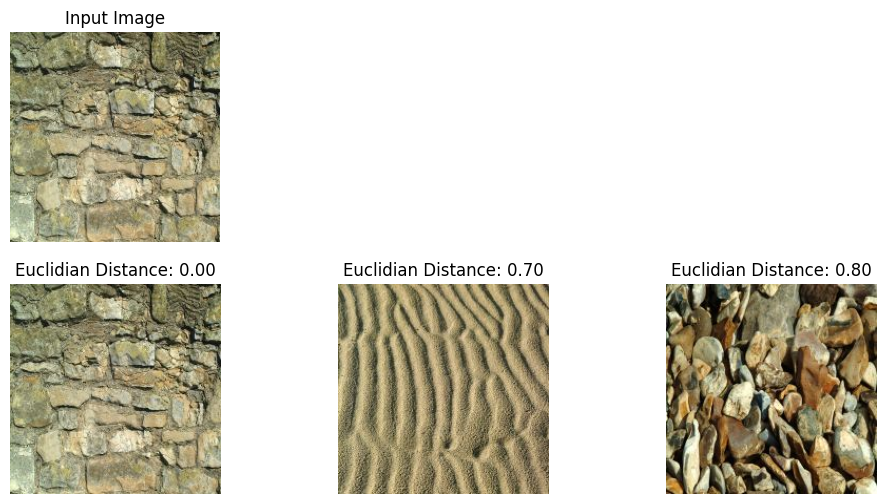

In [30]:
def euclidean_distance(hist1, hist2):
    return np.linalg.norm(hist1 - hist2)

distances = [(name, euclidean_distance(input_hist, hist)) for name, hist in database_histograms]

distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Euclidian Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

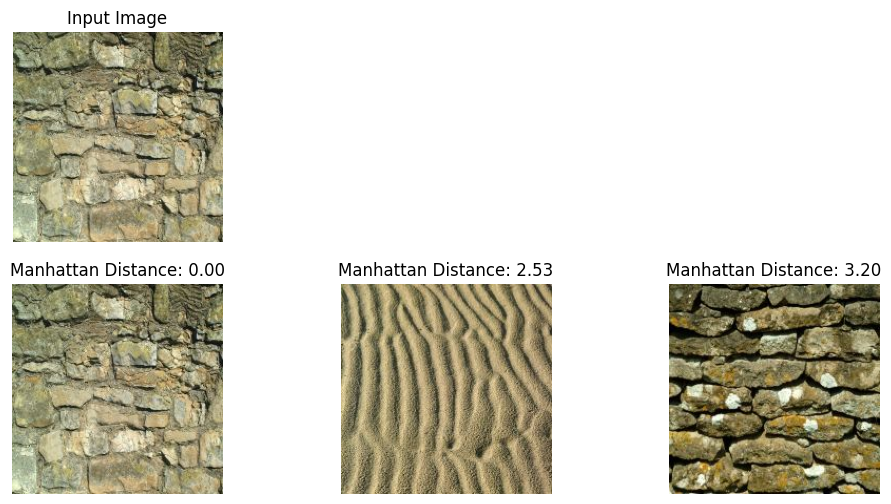

In [31]:
def manhattan_distance(hist1, hist2):
  return np.sum(np.abs(hist1 - hist2))

distances = [(name, manhattan_distance(input_hist, hist)) for name, hist in database_histograms]

distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Manhattan Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

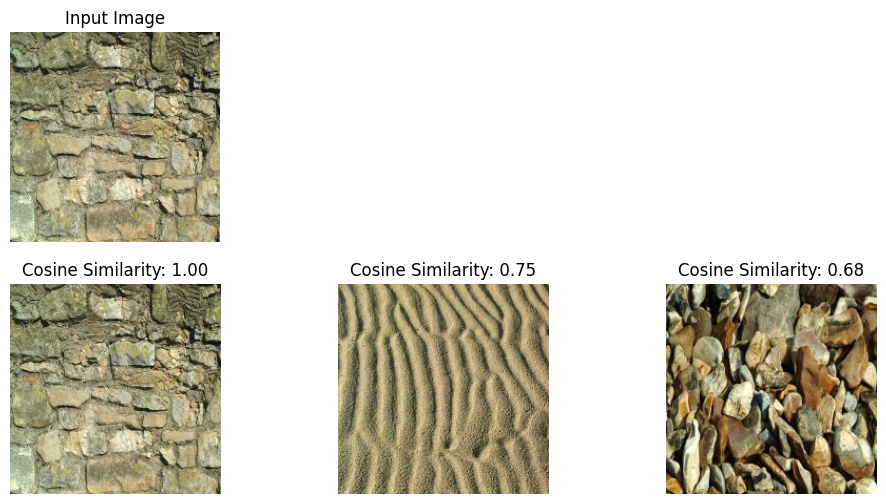

In [32]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity

similarities = [(name, cosine_similarity(input_hist, hist)) for name, hist in database_histograms]
similarities.sort(key=lambda x: x[1], reverse=True)
top_similar_images = similarities[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Cosine Similarity: {dist:.2f}")
    plt.axis('off')

plt.show()

# VGG16

In [35]:
from keras.applications.vgg16 import VGG16, preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [36]:
def extract_features(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

In [37]:
input_image = cv2.imread("database/01.jpg")
input_image = cv2.resize(input_image, (224, 224))

input_features = extract_features("database/01.jpg", model)

database_images = []
for filename in os.listdir("database"):
    img_path = os.path.join("database", filename)
    features = extract_features(img_path, model)
    database_images.append((filename, features))

1/1 [==============================] - 0s 43ms/step


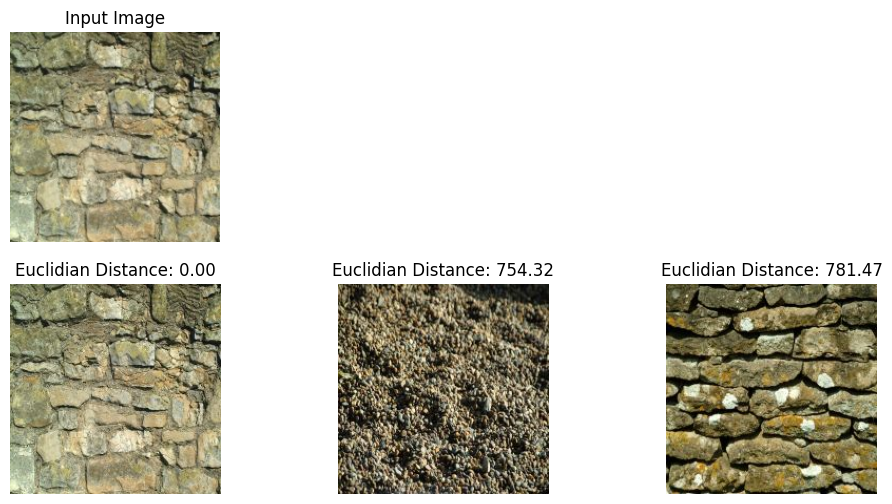

In [38]:
distances = [(name, euclidean_distance(input_features, features)) for name, features in database_images]
distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image_rgb = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image_rgb)
    plt.title(f"Euclidian Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

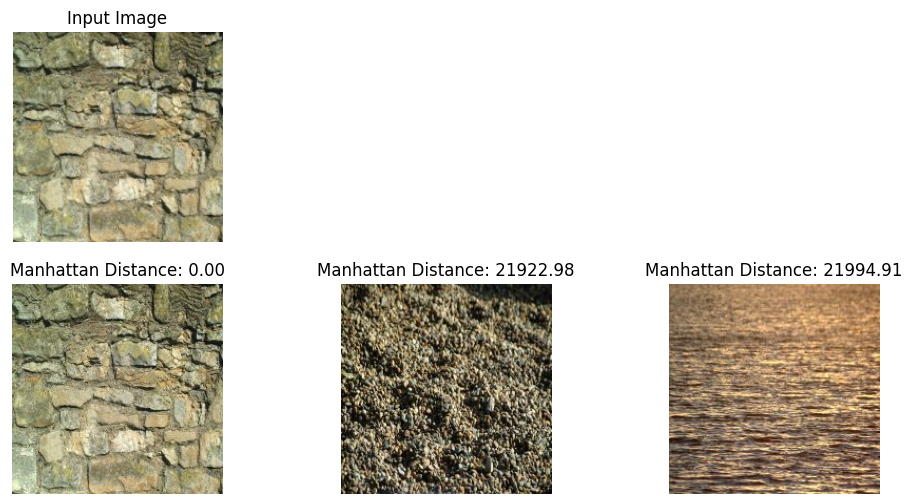

In [39]:
distances = [(name, manhattan_distance(input_features, features)) for name, features in database_images]

distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Manhattan Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

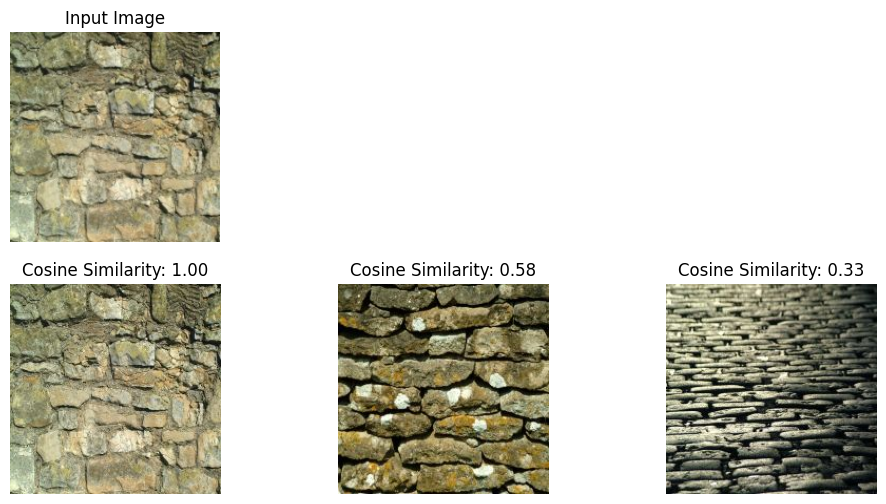

In [40]:
similarities = [(name, cosine_similarity(input_features, features)) for name, features in database_images]
similarities.sort(key=lambda x: x[1], reverse=True)
top_similar_images = similarities[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Cosine Similarity: {dist:.2f}")
    plt.axis('off')

plt.show()